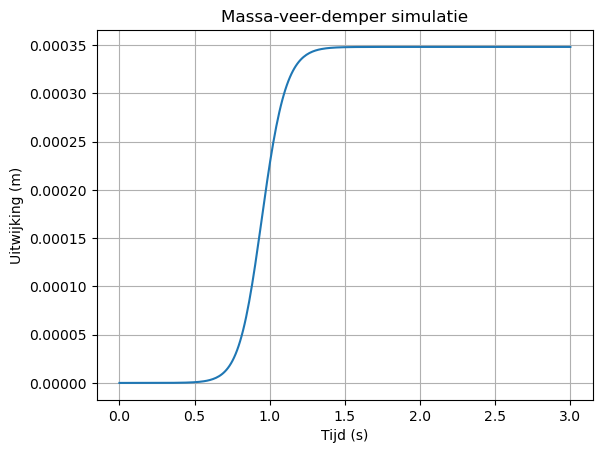

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Parameters
m = 0.01  # massa in kg
k = 10       # veerconstante in N/m
c = 0.63   # demping in Ns/m

tijd = []
versnelling = []

with open('versnellingsprofiel_glad.csv') as file:
    reader = csv.reader(file)
    next(reader)  # sla kopregel over
    tijd, versnelling = zip(*[(float(r[0]), float(r[1])) for r in reader])
    tijd = list(tijd)
    versnelling = list(versnelling)

tijd = np.array(tijd)
a_input = np.array(versnelling)

dt = tijd[1] - tijd[0]

x = np.zeros_like(tijd)
v = np.zeros_like(tijd)

for i in range(1, len(tijd)):
    a_net = a_input[i] - (c/m) * v[i-1] - (k/m) * x[i-1]
    v[i] = v[i-1] + dt * a_net
    x[i] = x[i-1] + dt * v[i]

plt.plot(tijd, x)
plt.xlabel('Tijd (s)')
plt.ylabel('Uitwijking (m)')
plt.title('Massa-veer-demper simulatie')
plt.grid()
plt.show()